In [2]:
# To create various vizualizations
from sqlalchemy import create_engine, Column, Integer, String, Boolean, DateTime
from sqlalchemy.orm import declarative_base, sessionmaker
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Database connection parameters
username = 'root'
password = 'iamukr77'
host = 'localhost'
port = '3306'  # Default MySQL port
database = 'hms'  # Your schema name

# Create an engine instance with provided credentials
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Define the ORM base class
Base = declarative_base()

# Define the ORM mapping for the rooms table
class Room(Base):
    __tablename__ = 'rooms'
    id = Column(Integer, primary_key=True, autoincrement=True)
    room_no = Column(Integer, unique=True)
    price = Column(Integer)
    room_type = Column(String(2))
    currently_booked = Column(Boolean, default=False)
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

# Define the ORM mapping for the reservations table
class Reservation(Base):
    __tablename__ = 'reservations'
    id = Column(Integer, primary_key=True, autoincrement=True)
    g_id = Column(Integer)
    r_date = Column(DateTime)
    check_in = Column(DateTime)
    check_out = Column(DateTime)
    meal = Column(Boolean)
    r_id = Column(Integer)
    r_type = Column(String(2))
    created_at = Column(DateTime, default=datetime.datetime.utcnow)

# Create a sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

Number of vacant rooms:  14
Number of booked rooms:  4


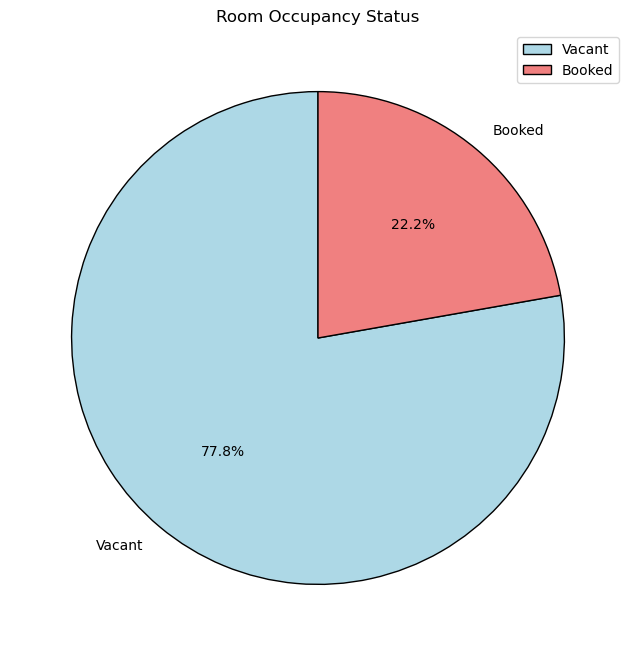

In [3]:
# Visualizing Room Occupancy status in real time
try:
    # Fetch check_out data
    query = "SELECT check_out FROM reservations"
    reservation_data = pd.read_sql(query, engine)
    
    # Count the number of vacant and booked rooms based on check_out status
    vacant_rooms = reservation_data['check_out'].notnull().sum()
    booked_rooms = reservation_data['check_out'].isnull().sum()
    
    # Print the number of vacant and booked rooms
    print("Number of vacant rooms: ", vacant_rooms)
    print("Number of booked rooms: ", booked_rooms)
    
    # Define labels and colors for the pie chart
    labels = ['Vacant', 'Booked']
    counts = [vacant_rooms, booked_rooms]
    colors = ['lightblue', 'lightcoral']
    
    # Plot the data as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Room Occupancy Status')
    plt.legend(labels, loc="upper right")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    session.close()  # Close the session

Number of people who opted for no meal:  6
Number of people who opted for meal:  12


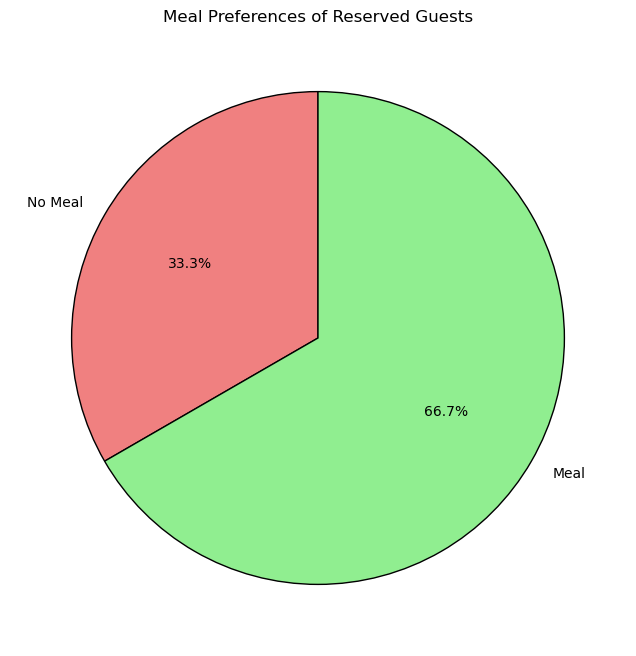

In [7]:
# Visualizing the Meal preference status in real time
try:
    # Fetch meal data
    query = "SELECT meal FROM reservations"
    meal_data = pd.read_sql(query, engine)
    
    # Count the number of people who opted for meals and those who did not
    meal_counts = meal_data['meal'].value_counts().sort_index()
    
    # Print the number of people who opted for meals and those who did not
    print("Number of people who opted for no meal: ", meal_counts.get(0, 0))
    print("Number of people who opted for meal: ", meal_counts.get(1, 0))
    
    # Define labels and colors for the pie chart
    labels = ['No Meal', 'Meal']
    colors = ['lightcoral', 'lightgreen']
    
    # Plot the data as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(meal_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Meal Preferences of Reserved Guests')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    session.close()  # Close the session

Price Range and Room Count:
price_range
4000-4999    0
5000-5999    3
6000-6999    4
7000-8999    1
Name: count, dtype: int64


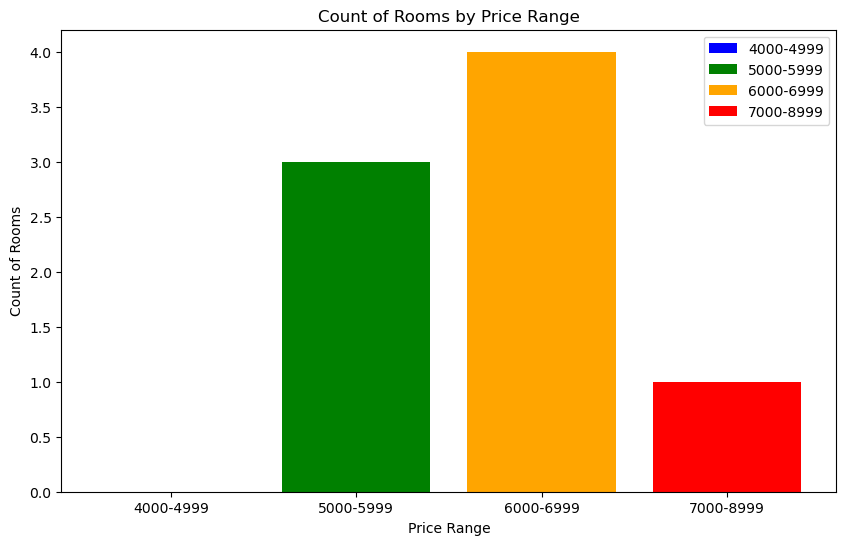

In [9]:
# Visualizing the COUNT of rooms based on price range in real time.. 
try:
    # Fetch prices
    query = "SELECT price FROM rooms"
    prices_data = pd.read_sql(query, engine)
    
    # Define the price ranges
    bins = [4000, 5000, 6000, 7000, 8000]
    labels = ['4000-4999', '5000-5999', '6000-6999', '7000-8999',]
    
    # Categorize prices into the defined ranges
    prices_data['price_range'] = pd.cut(prices_data['price'], bins=bins, labels=labels, right=False)
    
    # Count the number of rooms in each price range
    price_range_counts = prices_data['price_range'].value_counts().sort_index()
    
    # Print the price range counts
    print("Price Range and Room Count:")
    print(price_range_counts)
    
    # Define colors for each price range
    colors = ['blue', 'green', 'orange', 'red']
    
    # Plot the data with different colors for each bar
    plt.figure(figsize=(10, 6))
    bars = plt.bar(price_range_counts.index.astype(str), price_range_counts.values, color=colors)
    
    # Add legend
    for bar, label in zip(bars, labels):
        bar.set_label(label)
    plt.legend()
    
    plt.xlabel('Price Range')
    plt.ylabel('Count of Rooms')
    plt.title('Count of Rooms by Price Range')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    session.close()  # Close the session

Room Number and Type:
    room_no room_type
0         1         D
1         2         D
2        10         D
3         5         D
4        77         D
5        12         D
6        15         D
7        16         D
8        17         D
9        18         D
10       19         N
11       20         N


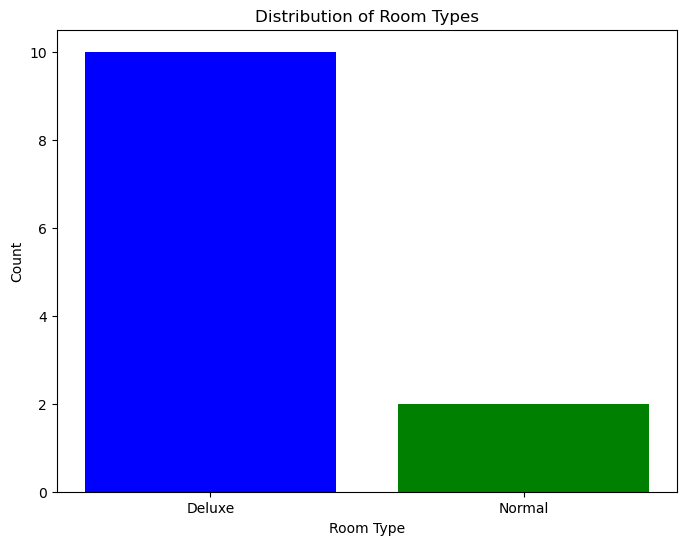

In [6]:
# Visualizing the distribution of room_type in real time
try:
    # Fetch room_no and room_type
    query = "SELECT room_no, room_type FROM rooms"
    rooms_data = pd.read_sql(query, engine)
    
    # Print room_no and room_type
    print("Room Number and Type:")
    print(rooms_data)
    
    # Fetch room types and their counts for visualization
    query = "SELECT room_type, COUNT(*) as count FROM rooms GROUP BY room_type"
    data = pd.read_sql(query, engine)
    
    # Replace room_type values with descriptive labels
    data['room_type'] = data['room_type'].replace({'D': 'Deluxe', 'N': 'Normal'})

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.bar(data['room_type'], data['count'], color=['blue', 'green'])
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.title('Distribution of Room Types')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    session.close()  # Close the session